Caracteristicas:  
id = id  
marca = brand  
modelo = model  
ano = year  
quilometragem = miles  **--> 1 milha(miles) = 1.60934 quilometros (km)**  
consumo na cidade = city_mileage  **--> 1 MPG ~= 0.425 km/L** -- ex: 25 MPG x 0.425 = 10,63 km/L  
consumo na rodovia = highway_mileage  **--> 1 MPG ~= 0.425 km/L**  
potência = horsepower  **--> HP ~= 0.986 cv --> 1 cv ~= 1.0139 HP**  
torque = torque  
capacidade do motor em litro = engine_capacity_litre  **--> Lê se motor 1.0 ou motor 1.5 etc**  
capacidade do combustivel = fuel_capacity  **--> Medida Americana = Galão = 1 galão = 3.785 litros**  
número de cilindros = num_cylinder  
número de assentos = num_seat  
número de proprietários = num_owners  
preço = price  
link = link  
condição = condition  
tipo = type  
número de portas = door  
tração nas rodas = wheel_drive    
tipo de motor = engine_type    
Câmbio do veiculo = speed_levels  
altura livre dianteira = front_headroom   **--> 1 polegada = 2.54 cm**  
espaço para pernas dinateiro = front_legroom  **--> 1 polegada = 2.54 cm**  
altura livre traseira = rear_headroom  **--> 1 polegada = 2.54 cm**  
espaço para pernas traseiro = rear_legroom  **--> 1 polegada = 2.54 cm**  
registros de manutenção/serviços =  service_records

### Vamos realizar as análises iniciais dos dados brutos da empresas autotrader e carfax, Faremos inicialmente análises estatística descritivas e exploratória de todas as variáveis do modelo.

In [14]:
# Importe das libs
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm # Criada para criar um modelo diferente de regressão linear

In [2]:
df_cars = pd.read_csv('cars.csv', sep=',')

In [3]:
# Criando um copia dos dados original para preservá-los
df_cars_copia = df_cars.copy()
df_cars_copia

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,link,condition,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590,https://www.carvana.com/vehicle/2386932,NaN,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590,https://www.carvana.com/vehicle/2586884#vehicl...,NaN,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590,https://www.carvana.com/vehicle/2558137,NaN,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787,https://www.carfax.com/vehicle/5NPD74LF6KH413647,4.0,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,11,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,4,5,2,18277,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,12,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,4,5,1,33777,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,13,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,4,5,1,26999,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,hybrid_gas_electric,NaN,39.1,42.2,37.1,36.2,2
8,14,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,4,5,1,22491,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,15,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,4,5,2,17500,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [4]:
# Analisar os tipos dos atributos
df_cars_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [5]:
# Valores nulos
df_cars_copia.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [6]:
# Valor total de nulos

print(f'Valor total de nulos: {df_cars_copia.isnull().sum().sum()}')
print(f'Porcentagem em relação ao total dos dados: {(df_cars_copia.isnull().sum().sum() / len(df_cars)) / 100}%')

Valor total de nulos: 52
Porcentagem em relação ao total dos dados: 0.01%


In [7]:
# mediana da coluna speed_levels
mediana_speed_levels = df_cars_copia['speed_levels'].median()
mediana_speed_levels

6.0

### Referentes ao valores nulos serão tomadas duas ações:  
**.1º** A coluna condition será excluida pois só temos um valor válido, sendo assim não teremos nenhuma distorção que venha a atrapalhar análises e modelos futuros que iremos rodar;  
**.2**  A coluna id não será necessária para nossa análise então também irei excluí-lá junto com a coluna condition  
**.3** A coluna speed_levels só tem um valor nulo com base nos valores da coluna irei utilizar a técnica de susbtituição útilizando a técnica da mediana da coluna, que foi **6**

In [8]:
# Dropando coluna condition e preenchendo valor nulo da coluna speed_levels com a mediana da coluna.
df_cars_copia = df_cars_copia.drop(['condition', 'id'], axis=1)

df_cars_copia = df_cars_copia.fillna(mediana_speed_levels)

display(df_cars_copia)

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,link,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590,https://www.carvana.com/vehicle/2386932,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590,https://www.carvana.com/vehicle/2586884#vehicl...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590,https://www.carvana.com/vehicle/2558137,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787,https://www.carfax.com/vehicle/5NPD74LF6KH413647,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,4,5,2,18277,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,4,5,1,33777,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,4,5,1,26999,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,4,5,1,22491,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,4,5,2,17500,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [9]:
#Transformando tipo da coluna price de int64 para float64
df_cars_copia['price'] = df_cars_copia['price'].astype('float64')
df_cars_copia

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,link,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590.0,https://www.carvana.com/vehicle/2386932,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590.0,https://www.carvana.com/vehicle/2586884#vehicl...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590.0,https://www.carvana.com/vehicle/2558137,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787.0,https://www.carfax.com/vehicle/5NPD74LF6KH413647,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,4,5,2,18277.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,4,5,1,33777.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,4,5,1,26999.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,4,5,1,22491.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,4,5,2,17500.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [10]:
df_cars_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  52 non-null     object 
 1   model                  52 non-null     object 
 2   year                   52 non-null     int64  
 3   miles                  52 non-null     int64  
 4   city_mileage           52 non-null     int64  
 5   highway_mileage        52 non-null     int64  
 6   horsepower             52 non-null     int64  
 7   torque                 52 non-null     int64  
 8   engine_capacity_litre  52 non-null     float64
 9   fuel_capacity          52 non-null     float64
 10  num_cylinder           52 non-null     int64  
 11  num_seat               52 non-null     int64  
 12  num_owners             52 non-null     int64  
 13  price                  52 non-null     float64
 14  link                   52 non-null     object 
 15  type    

In [11]:
# Análisando estatística descritiva básica dos dados
df_cars_copia.describe() 

,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232692,4.038462,5.0,1.346154,21763.423077,4.0,2.153846,6.307692,38.680769,42.467308,37.238462,37.632692,7.326923
std,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,0.0,0.622601,3532.455322,0.0,0.538138,0.755073,0.919087,1.045198,0.444202,1.604249,4.714272
min,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,5.0,1.000000,13590.000000,4.0,2.000000,6.000000,37.500000,41.100000,35.800000,33.200000,1.000000
25%,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,5.0,1.000000,19519.000000,4.0,2.000000,6.000000,37.725000,42.200000,37.075000,37.175000,4.000000
50%,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,5.0,1.000000,21998.500000,4.0,2.000000,6.000000,38.500000,42.300000,37.200000,37.400000,6.000000
75%,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,5.0,2.000000,22996.000000,4.0,2.000000,6.000000,39.300000,42.400000,37.500000,38.300000,10.000000
max,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,5.0,3.000000,33777.000000,4.0,4.000000,9.000000,40.400000,45.500000,38.000000,40.400000,26.000000


# Análise Exploratória dos dados

Agora com os dados tratados irei fazer a análise exploratória buscando obter insights necessários para confirmar alguns tópicos da análise descritiva e ajustarmos pontos necessários para rodarmos nosso modelo de Machine learning.

**Irei utilizar o atributo price como fato(dependente) para avaliar variações relevantes devido a mudança nos valores dos outros atributos independentes**

Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas  
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;  
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;  
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;  
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;  
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.  

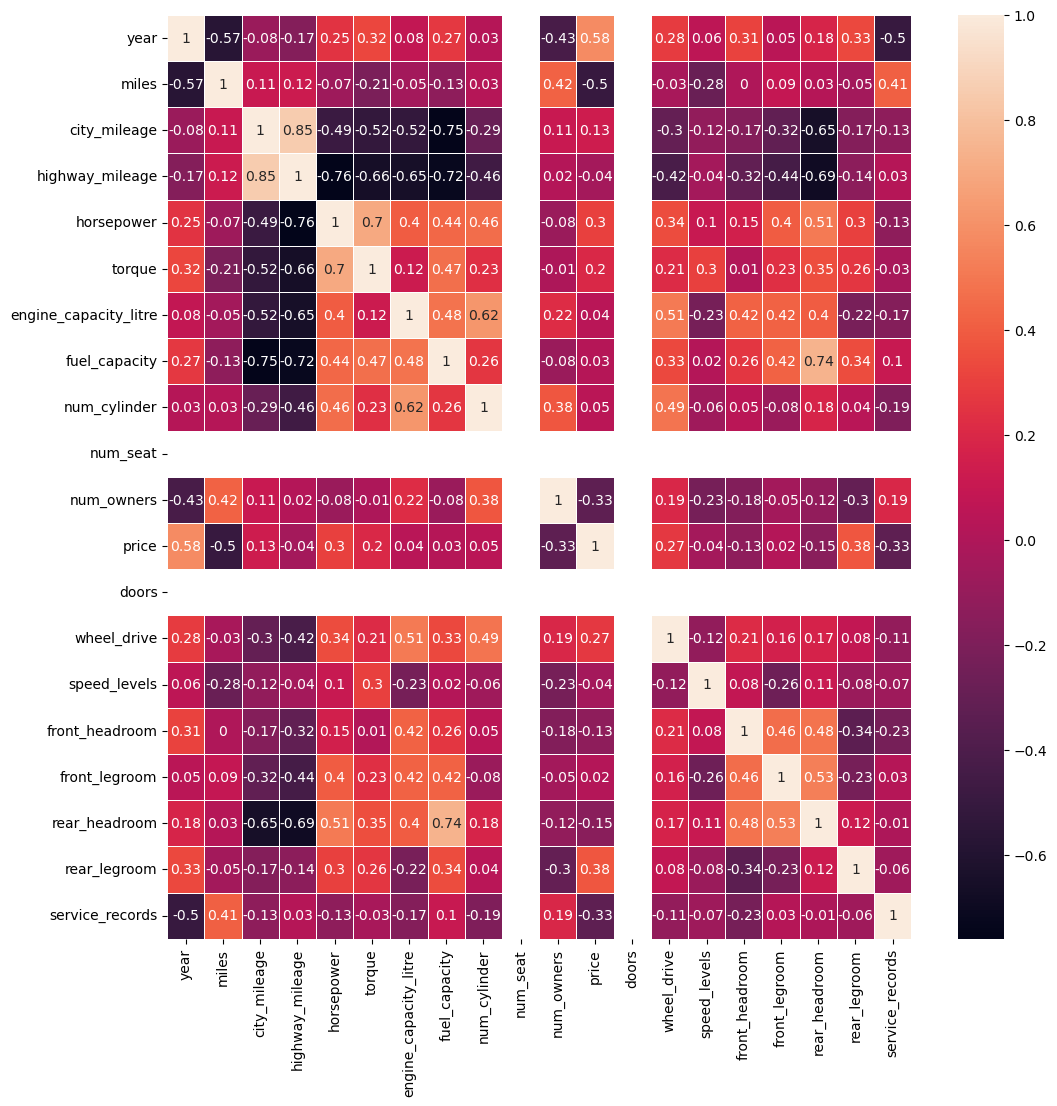

In [12]:
# Gráfico mapa de calor para avaliar relações entre price e os outros atributos
correlation_matrix = df_cars_copia.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

### Observando a correlação do preço pelos os outros atributos vaemos que naõ temos um correlação muito forte só temos um correlação fraca negatova e moderada positiva.

**Então para fins educativos irei utilizar os atributos year, miles, num_owners, horsepower, rear_legroom, service_records, para prosseguirmos com nossa análises esse atributos serão relacionados com o preço**  

# Análise com gráficos

In [13]:
df_cars_copia

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,link,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590.0,https://www.carvana.com/vehicle/2386932,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590.0,https://www.carvana.com/vehicle/2586884#vehicl...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590.0,https://www.carvana.com/vehicle/2558137,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787.0,https://www.carfax.com/vehicle/5NPD74LF6KH413647,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,4,5,2,18277.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,4,5,1,33777.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,4,5,1,26999.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,4,5,1,22491.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,4,5,2,17500.0,https://www.autotrader.com/cars-for-sale/vehic...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


### **Análise Preço por Milhas**

In [ ]:
#Preço por Ano
X_y = df_cars_copia.loc[:, 'year'].values
y = df_cars.loc[:, 'price'].values
corr_p_y = np.corrcoef(X_y, y)
corr_p_y

array([[1.        , 0.58125396],
       [0.58125396, 1.        ]])

In [46]:
# Transforma valores independentes em matrix
X_matrix_y = X_y.reshape(-1, 1)

In [ ]:
# Instânciando (Cria objeto) a Regressão Linear
modelo_1 = LinearRegression()
modelo_1.fit(X_matrix_y, y)

LinearRegression()

In [60]:
print(f'Interceptação: {modelo_1.intercept_}')
print(f'Inclinação: {modelo_1.coef_}')
print(f'Coeficiente: {modelo_1.score(X_matrix_y, y)}')

Interceptação: -2946538.5975633357
Inclinação: [1470.42235544]
Coeficiente: 0.33785617149257197


In [49]:
previsoes_p_y = modelo_1.predict(X_matrix_y)
previsoes_p_y

array([22244.13807774, 19303.29336685, 14892.02630052, 17832.87101141,
       22244.13807774, 17832.87101141, 26655.40514407, 20773.7157223 ,
       22244.13807774, 19303.29336685, 16362.44865597, 22244.13807774,
       20773.7157223 , 23714.56043319, 23714.56043319, 22244.13807774,
       23714.56043319, 22244.13807774, 22244.13807774, 22244.13807774,
       22244.13807774, 23714.56043319, 22244.13807774, 20773.7157223 ,
       19303.29336685, 23714.56043319, 23714.56043319, 22244.13807774,
       22244.13807774, 20773.7157223 , 22244.13807774, 19303.29336685,
       22244.13807774, 23714.56043319, 22244.13807774, 22244.13807774,
       20773.7157223 , 22244.13807774, 20773.7157223 , 23714.56043319,
       20773.7157223 , 22244.13807774, 23714.56043319, 22244.13807774,
       23714.56043319, 22244.13807774, 20773.7157223 , 22244.13807774,
       23714.56043319, 22244.13807774, 23714.56043319, 20773.7157223 ])

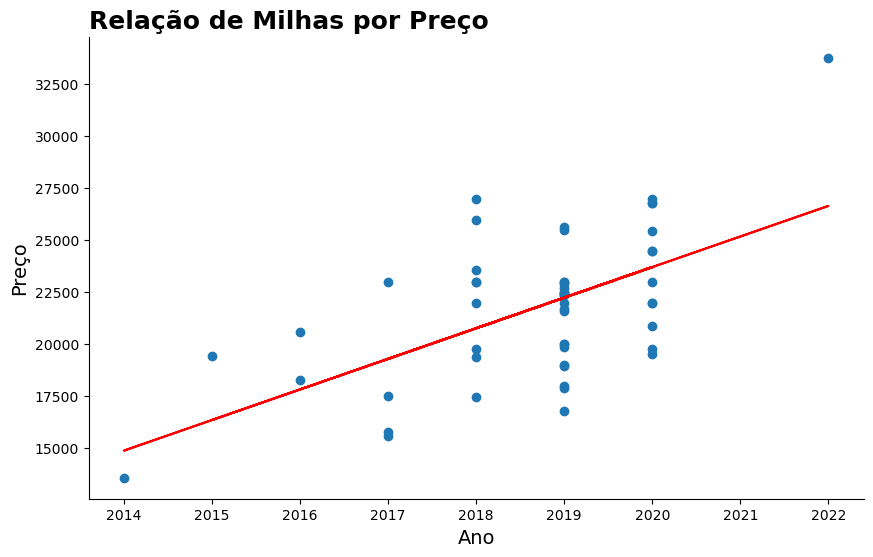

In [50]:
# Correlação de Ano por Preço

plt.figure(figsize=(10,6))
plt.scatter(X_matrix_y,y)
plt.plot(X_matrix_y, previsoes_p_y, color = 'red')
plt.title('Relação de Milhas por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

### **Análise Preço por Milhas**

In [45]:
X_m = df_cars_copia.loc[:, 'miles'].values
corr_p_m = np.corrcoef(X_m, y)
corr_p_m

array([[ 1.        , -0.50076868],
       [-0.50076868,  1.        ]])

In [53]:
# Transforma valores independentes em matrix
X_matrix_m = X_m.reshape(-1, 1)

In [57]:
# Instânciando (Cria objeto) a Regressão Linear
modelo_2 = LinearRegression()
modelo_2.fit(X_matrix_m, y)

LinearRegression()

In [59]:
print(f'Interceptação: {modelo_2.intercept_}')
print(f'Inclinação: {modelo_2.coef_}')
print(f'Coeficiente: {modelo_2.score(X_matrix_m, y)}')

Interceptação: 24405.170699921255
Inclinação: [-0.07792479]
Coeficiente: 0.25076926652973597


In [62]:
previsoes_p_m = modelo_2.predict(X_matrix_m)
previsoes_p_m

array([22287.72051269, 18409.55980472, 16844.36256994, 16971.45789454,
       22191.71717737, 19615.9913286 , 23874.42498818, 22092.830625  ,
       22453.62238031, 22362.37245688, 22383.87969759, 21890.53788272,
       22850.57123592, 22868.5718613 , 23152.45185365, 22206.60081134,
       23439.29298783, 21808.56100873, 20023.22625587, 22515.49465972,
       21436.47015958, 21619.90510385, 21837.86072795, 22308.60435512,
       19236.49762486, 22265.58987371, 23439.29298783, 21147.9926049 ,
       22308.21473119, 23113.09983714, 23646.49499158, 23801.79908841,
       20947.57005747, 23396.51228077, 24015.54677411, 21147.9926049 ,
       23335.57509878, 22932.54810992, 20409.26564156, 21560.44849277,
       19875.71463755, 22266.91459506, 19800.59514466, 20686.98957588,
       23665.2748648 , 23335.9647227 , 18730.14237087, 21801.54777806,
       23327.47092112, 22573.3927751 , 23524.93232672, 17958.53114819])

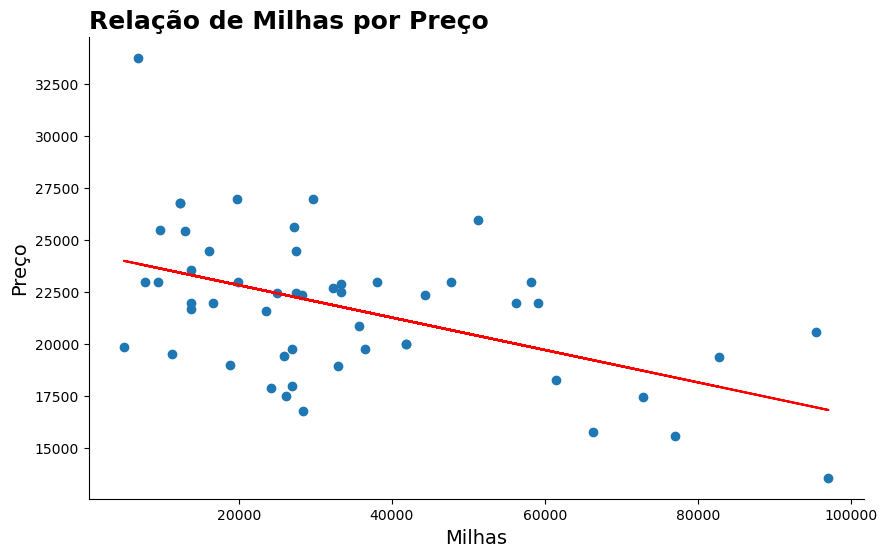

In [63]:
# Correlação de Preço por Milhas

plt.figure(figsize=(10,6))
plt.scatter(X_matrix_m,y)
plt.plot(X_matrix_m, previsoes_p_m, color = 'red')
plt.title('Relação de Milhas por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Milhas', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

## **Modelo de regressão linear com multiplas caracteristicas independentes**

In [89]:
X = df_cars_copia.loc[:, ['year', 'miles', 'horsepower', 'rear_legroom', 'service_records']].values
y = df_cars_copia.loc[:, 'price'].values
modelo_multiplos = LinearRegression()
modelo_multiplos.fit(X, y)
# R^2 Coeficiente de determinação
modelo_multiplos.score(X, y)

0.453822644115656

In [92]:
X

array([[2.0190e+03, 2.7173e+04, 1.4900e+02, 3.4700e+01, 4.0000e+00],
       [2.0170e+03, 7.6941e+04, 1.4600e+02, 3.5700e+01, 1.6000e+01],
       [2.0140e+03, 9.7027e+04, 1.5900e+02, 3.3200e+01, 1.3000e+01],
       [2.0160e+03, 9.5396e+04, 1.5800e+02, 3.7400e+01, 2.6000e+01],
       [2.0190e+03, 2.8405e+04, 1.4700e+02, 3.5700e+01, 5.0000e+00],
       [2.0160e+03, 6.1459e+04, 1.5800e+02, 3.7400e+01, 1.3000e+01],
       [2.0220e+03, 6.8110e+03, 1.8200e+02, 3.9500e+01, 6.0000e+00],
       [2.0180e+03, 2.9674e+04, 2.1200e+02, 3.6200e+01, 2.0000e+00],
       [2.0190e+03, 2.5044e+04, 1.4700e+02, 3.7400e+01, 6.0000e+00],
       [2.0170e+03, 2.6215e+04, 1.5000e+02, 3.8100e+01, 1.3000e+01],
       [2.0150e+03, 2.5939e+04, 1.4300e+02, 3.6200e+01, 1.5000e+01],
       [2.0190e+03, 3.2270e+04, 1.7400e+02, 3.7400e+01, 4.0000e+00],
       [2.0180e+03, 1.9950e+04, 1.5800e+02, 3.7400e+01, 9.0000e+00],
       [2.0200e+03, 1.9719e+04, 1.9200e+02, 4.0400e+01, 4.0000e+00],
       [2.0200e+03, 1.6076e+04, 1.

In [90]:
modelo_multiplos2 = sm.ols(formula= 'price ~ year + miles + num_owners + horsepower + rear_legroom + service_records', data=df_cars_copia)
modelo_treinado2 = modelo_multiplos2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     6.234
Date:                seg, 23 jun 2025   Prob (F-statistic):           8.06e-05
Time:                        18:12:21   Log-Likelihood:                -482.38
No. Observations:                  52   AIC:                             978.8
Df Residuals:                      45   BIC:                             992.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.443e+06   8.13e+05     -1.775      0.083   -3.08e+06    1.94e+05
year              715.6239    403.815      1.772      0.083     -97.701    1528.949
miles              -0.0485      0.022     -2.165      0.036      -0.094      -0.003
num_owners         55.5965    736.150      0.076      0.940   -1427.085    1538.278
horsepower         14.2658     12.302      1.160      0.252     -10.513      39.044
rear_legroom      503.7787    279.190      1.804      0.078     -58.539    1066.097
service_records   -20.4622     97.785     -0.209      0.835    -217.412     176.488
==============================================================================
Omnibus:                        2.318   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.744
Skew:                           0.446   Prob(JB):                        0.418
Kurtosis:                       3.090   Cond. No.                     8.59e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
previsoes = modelo_multiplos.predict(X)
previsoes

array([20526.91473896, 16919.01549116, 12824.859573  , 16132.50769279,
       20916.81604595, 18035.36893863, 26461.09437207, 21388.69750145,
       21905.25252138, 20674.53860758, 18177.95186553, 21986.35687187,
       21534.96499574, 25053.82839361, 23454.30672486, 21417.40893193,
       25405.96278206, 21706.55889432, 20483.86553311, 21901.70663546,
       23751.01327306, 23912.08489743, 21872.87710933, 22235.77097873,
       19697.93190344, 23629.65239108, 25405.96278206, 21298.98882183,
       21504.08415055, 21801.2474489 , 22288.08076637, 21557.68459728,
       20578.00662807, 24378.50362091, 22868.95837639, 21298.98882183,
       23542.99195791, 22400.05785922, 22032.5754592 , 23896.26073687,
       21578.21193156, 22030.83633913, 23223.47123247, 21077.13192906,
       24514.11720153, 22470.51741309, 19076.10637858, 21925.87677463,
       22306.9251596 , 23727.59368968, 22407.89814621, 20499.61411251])

In [93]:
new_car = np.array([2020, 5010, 212, 37.4, 4])
new_car = new_car.reshape(1, -1)
modelo_multiplos.predict(new_car)

array([24551.60870194])